<a href="https://colab.research.google.com/github/BarryLiu-97/Pytorch-Tutorial/blob/master/04_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 逻辑回归做分类任务
## 网络框架设计一般步骤
- 数据准备
- 用类设计模型
- 选定损失函数和优化器
- 训练循环


In [ ]:
import torch

In [ ]:
x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[0],[0],[1]])

In [ ]:
class LogisticRegressionModel(torch.nn.Module):
  def __init__(self):
    super(LogisticRegressionModel, self).__init__()
    self.linear = torch.nn.Linear(1,1)   #(输入维度，输出维度)

  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

In [ ]:
model = LogisticRegressionModel()

criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [ ]:
for epoch in range(1000):
  y_pred = model(x_data)
  loss = criterion(y_pred, y_data)
  print(epoch, loss.item())     #注意，loss本身是tensor形式

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

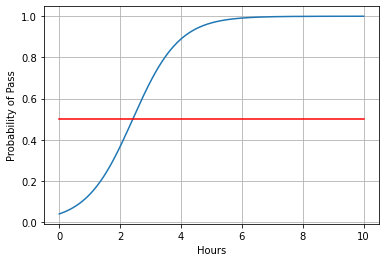

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 10, 200)    #每周学习时间0~10小时，采200个点
x_t = torch.Tensor(x).view((200,1)) #变为tensor，view方法相当于numpy中的reshape   
y_t = model(x_t)
y = y_t.data.numpy()        #化为numpy数组

plt.plot(x, y)
plt.plot([0,10], [0.5,0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()

发现和logistic函数很像，那是因为x只是做了线性变换得到了y，即y=ax+b。  图中2.5小时及格率为0.5，符合数据特征